## Load df

In [1]:
import pandas as pd
import os

In [2]:
project_dir = os.path.relpath(os.path.join(os.getcwd(), os.pardir))
features_dir = os.path.join(project_dir, "features")

#TODO: argument for dataset folder name
dataset_dir = os.path.join(features_dir, "music_audio_benchmark")

csv_file_name = "features.csv"
csv_file_path = os.path.join(dataset_dir, csv_file_name)

In [3]:
df = pd.read_csv(csv_file_path)
df.head()

,name,duration,tempo,chroma_key,mean_root_square_mean,mean_zero_crossing_rate,mean_spectral_centroid,mean_spectral_bandwith,mean_spectral_roll_off,path,label
0,50_Minutes-Colours,10.057,76.000,B,0.190,0.022,1674.793,2658.481,3660.322,C:\users\user\studia\audio_clustering_autoenco...,alternative
1,50_Minutes-Nightwalk,10.057,123.047,F,0.118,0.017,861.769,1539.166,1504.865,C:\users\user\studia\audio_clustering_autoenco...,alternative
2,50_Minutes-The_Great_Wall,10.057,132.512,B,0.203,0.024,1436.109,2315.439,3001.162,C:\users\user\studia\audio_clustering_autoenco...,alternative
3,Abigail_Lapell-Dress_Rehearsal,10.057,143.555,G,0.123,0.045,2235.110,2866.940,4680.926,C:\users\user\studia\audio_clustering_autoenco...,alternative
4,Albino_Catfish-Ice_Cream,10.057,132.512,C#,0.154,0.074,2708.956,2775.245,5276.057,C:\users\user\studia\audio_clustering_autoenco...,alternative


In [4]:
def show_df_summary(df):
    # Info
    print("\nDataFrame information:")
    print(df.info())
    print()
    
    # Null value
    print("Null values per column:")
    print(df.isnull().sum())
    print()

    # Shape
    print("\nDataFrame dimensions (rows, columns):")
    print(df.shape)
    print()

    # Column names
    print("\nColumn names:")
    print(df.columns)
    print()

    # Unique values
    print("\nNumber of unique values in each column:")
    print(df.nunique())
    print()

    # Descriptive statistics for numeric columns
    print("\nDescriptive statistics for numeric columns:")
    print(df.describe())
    print()

    # Frequency of unique values in each column
    print("\nFrequency of unique values in each column:")
    for column in df.columns:
        if df[column].dtype == 'object':
            print(f"\n{column}:")
            print(df[column].value_counts())

In [5]:
# show_df_summary(df)

## Prepare data for clustering

In [6]:
from sklearn.preprocessing import MinMaxScaler

In [7]:
num_labels = df['label'].nunique()
num_labels

9

In [8]:
df_to_cluster = df.drop(columns=['name', 'path', 'label'])

unique_chroma_key_values = df_to_cluster['chroma_key'].unique()
mapping_dict_chroma = {value: index for index, value in enumerate(unique_chroma_key_values)}
df_to_cluster['chroma_key'] = df_to_cluster['chroma_key'].map(mapping_dict_chroma)

columns_to_normalize = ['duration', 'tempo', 'mean_root_square_mean', 'mean_zero_crossing_rate',
                       'mean_spectral_centroid', 'mean_spectral_bandwith', 'mean_spectral_roll_off']
scaler = MinMaxScaler()
df_to_cluster[columns_to_normalize] = scaler.fit_transform(df_to_cluster[columns_to_normalize])
df_to_cluster

,duration,tempo,chroma_key,mean_root_square_mean,mean_zero_crossing_rate,mean_spectral_centroid,mean_spectral_bandwith,mean_spectral_roll_off
0,1.0,0.043163,0,0.379775,0.077844,0.219489,0.442600,0.244573
1,1.0,0.433232,1,0.217978,0.047904,0.080612,0.208994,0.069900
2,1.0,0.511707,0,0.408989,0.089820,0.178718,0.371006,0.191156
3,1.0,0.603265,2,0.229213,0.215569,0.315200,0.486106,0.327280
4,1.0,0.511707,3,0.298876,0.389222,0.396140,0.466969,0.375508
...,...,...,...,...,...,...,...,...
1881,1.0,0.433232,5,0.503371,0.323353,0.349989,0.438103,0.334580
1882,1.0,0.795236,10,0.471910,0.305389,0.470188,0.622473,0.531903
1883,1.0,0.287492,4,0.438202,0.323353,0.474272,0.626926,0.519644
1884,1.0,0.344518,4,0.732584,0.556886,0.622069,0.691069,0.652909


In [9]:
# show_df_summary(df_to_cluster)

## Get amount of clusters

In [10]:
import matplotlib
import matplotlib.pyplot as plt
from itertools import cycle

print(f"Interactive mode: {matplotlib.is_interactive()}")
print(f"matplotlib backend: {matplotlib.rcParams['backend']}")

color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

Interactive mode: False
matplotlib backend: module://matplotlib_inline.backend_inline


C:\Users\User\miniconda3\envs\audio\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\User\miniconda3\envs\audio\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(
C:\Users\User\miniconda3\envs\audio\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\Users\User\miniconda3\envs\audio\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when th

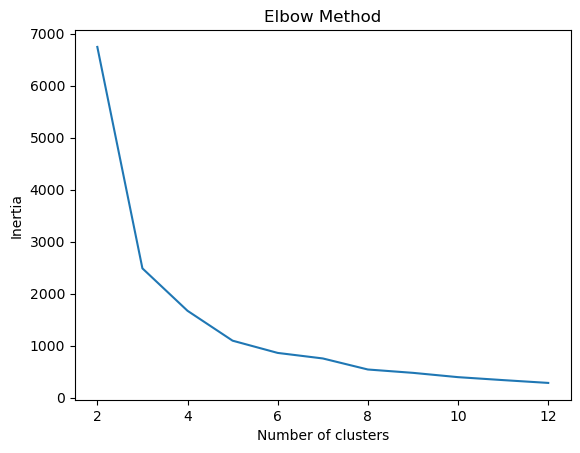

In [11]:
from sklearn.cluster import KMeans

inertia = list()
for i in range(2, 13):
    kmeans = KMeans(n_clusters = i, n_init='auto')
    kmeans.fit(df_to_cluster)
    inertia.append(kmeans.inertia_)

plt.plot(range(2, 13), inertia)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

## KMeans